## Problem

Build decision tree model to predict survival based on certain parameters:

In this file using following columns build a model to predict if person would survive or not:
1. Pclass
2. Sex
3. Age
4. Fare

In [104]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt

In [105]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Preprocessing and Analysis 

In [106]:
survived = df[df.Survived==1]
survived.shape

(342, 12)

In [107]:
died = df[df.Survived==0]
died.shape

(549, 12)

In [108]:
df.select_dtypes(include=[np.number]).groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


<Axes: xlabel='Sex'>

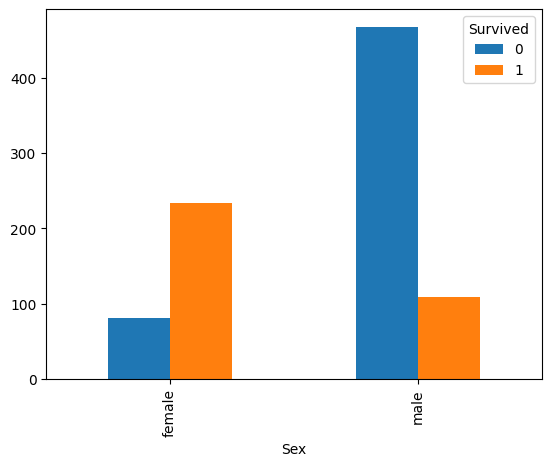

In [109]:
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')

In [110]:
df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns', inplace=True)
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [111]:
le_sex = LabelEncoder()
df['sex_n'] = le_sex.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,Fare,sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,0
889,1,1,male,26.0,30.0000,1


In [112]:
df.drop('Sex', axis='columns', inplace=True)
df

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [113]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
sex_n         0
dtype: int64

In [114]:
df.Age = df.Age.fillna(df.Age.mean())
df

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [115]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
sex_n       0
dtype: int64

### Model

In [116]:
X = df.drop('Survived', axis='columns')
X

,Pclass,Age,Fare,sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [117]:
y = df['sex_n']
y

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex_n, Length: 891, dtype: int32

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
X_train

,Pclass,Age,Fare,sex_n
140,3,29.699118,15.2458,0
439,2,31.000000,10.5000,1
817,2,31.000000,37.0042,1
378,3,20.000000,4.0125,1
491,3,21.000000,7.2500,1
...,...,...,...,...
835,1,39.000000,83.1583,0
192,3,19.000000,7.8542,0
629,3,29.699118,7.7333,1
559,3,36.000000,17.4000,0


In [120]:
X_test

,Pclass,Age,Fare,sex_n
495,3,29.699118,14.4583,1
648,3,29.699118,7.5500,1
278,3,7.000000,29.1250,1
31,1,29.699118,146.5208,0
255,3,29.000000,15.2458,0
...,...,...,...,...
780,3,13.000000,7.2292,0
837,3,29.699118,8.0500,1
215,1,31.000000,113.2750,0
833,3,23.000000,7.8542,1


In [121]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [122]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1])

In [123]:
y_test

495    1
648    1
278    1
31     0
255    0
      ..
780    0
837    1
215    0
833    1
372    1
Name: sex_n, Length: 179, dtype: int32

In [124]:
model.score(X_test, y_test)

1.0

Text(0.5, 1.0, 'Confusion Matrix')

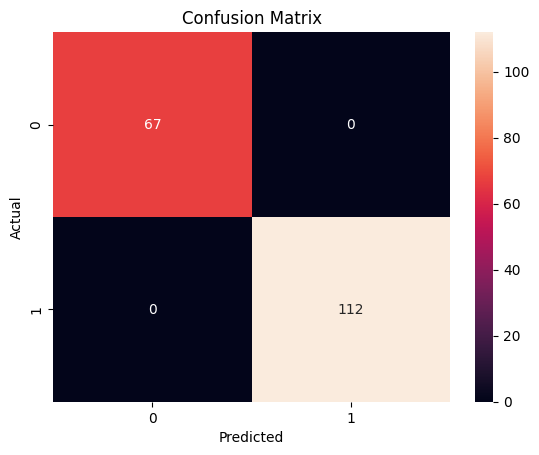

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')